### Normalization of Data - when ever we are taking distance between two points normalizing is must , 
     * Unstructered ML
     * KNN


### KNN - K Nearest Neighbour

    * KNN does not create any Model it remembers the Training Data
    * K - no of points ( generally odd ) - max no of points from particular class that class is output
    * K - how many optimal points ?, Plot curve - find max score select that K
    * Lazy Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# importing KNN Lib

from sklearn.neighbors import KNeighborsClassifier

In [3]:
# dividing the data 

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
filename = 'pima-indians-diabetes.data.csv'
column_names = [ 'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

pima = pd.read_csv(filename,names=column_names)

In [5]:
pima.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
pima.iloc[:,-1].value_counts()

0    500
1    268
Name: class, dtype: int64

In [10]:
x = pima.iloc[:,0:-1]
y = pima.iloc[:,-1]

In [11]:
x.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
# dividing the data - 10 parts - 10 Models

kfold = KFold(n_splits=10)

In [13]:
# form of model

model_knn = KNeighborsClassifier(n_neighbors=17)

In [14]:
result_knn = cross_val_score(model_knn, x, y, cv = kfold)

In [15]:
result_knn

array([0.71428571, 0.80519481, 0.66233766, 0.63636364, 0.76623377,
       0.79220779, 0.80519481, 0.85714286, 0.77631579, 0.75      ])

In [16]:
result_knn.mean()

0.7565276828434724

### Grid Search for Algorithm Tuning  - Optimal K 

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
k = np.arange(1,41)

param_grid = dict(n_neighbors=k)  # n_neighbors = is key word
# param_grid = {'n_neighbors' : 'k'}

In [19]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40])}

In [20]:
# finding how many optimal k? 

model_grid = KNeighborsClassifier()


In [21]:
grid = GridSearchCV(estimator=model_grid,param_grid=param_grid)

grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [24]:
print(f'Best Score  = {grid.best_score_}')

Best Score  = 0.7578558696205755


In [25]:
print(f'Best Score for K = {grid.best_params_}')

Best Score for K = {'n_neighbors': 14}


### Visualizing the CV results

In [26]:
k_scores = []
# use iteration to caclulate different k in models, then return the average accuracy based on the cross validation

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    result = cross_val_score(knn,x,y,cv=kfold)
    k_scores.append(result.mean())


Text(0, 0.5, 'Cross-Validated Accuracy')

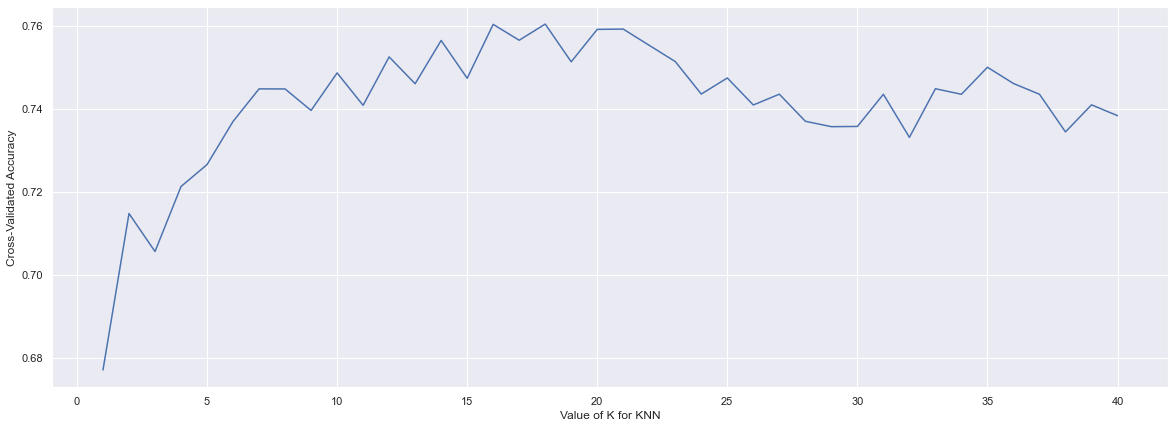

In [27]:
plt.figure(figsize=(20,7))

plt.plot(k,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')